In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [4]:
def get_classlabel(class_code):
    labels = {0: 'bag', 1: 'bed', 2: 'chair', 3: 'coffeetable' , 4: 'cup',  5: 'kitchentools', 6: 'lamp', 7: 'laptop', 8: 'LivingSofa', 9: 'pot', 10: 'shoe'}    
    
    return labels[class_code]

In [5]:
class_names = ['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools', 'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

Images = []
Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
label = 0

csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

for image_file in os.listdir('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train'):
  image = cv2.imread('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train' +r'/' + image_file)
  image = cv2.resize(image, (150,150))

  #
  print('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train' +r'/' + image_file)
  #

  Images.append(image)

for i in range(1000):
  cnt = 0
  for j in csv_file.file_name:
    cnt = cnt + 1
    num = int(j[3:8])

    if(i == num):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 == cnt):
          Labels.append(class_names_label[k])
          cnt = 0
          cnt2 = 0
          break


/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00000.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00001.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00002.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00016.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00014.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00009.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00018.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00010.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00005.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00007.png


In [6]:
Images, Labels = shuffle(Images,Labels,random_state=817328462) # shuffle need?

In [7]:
Images = np.array(Images, dtype=np.float32) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [8]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (864, 150, 150, 3)
Shape of Labels: (864,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

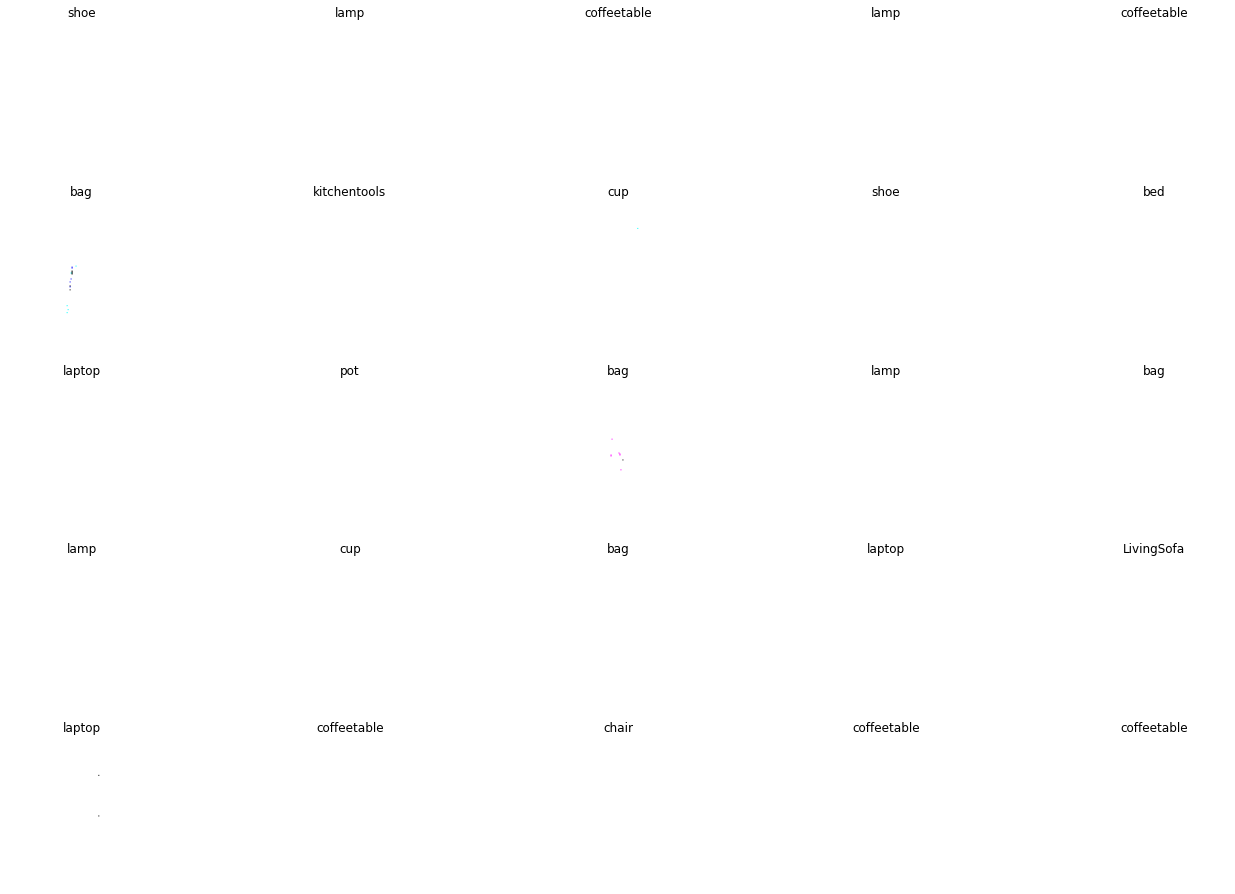

In [13]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [10]:
train_DIR = "/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train"

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          vertical_flip=True,
                                          fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(train_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_DIR = "/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val"

validation_datagen = ImageDataGenerator(rescale = 1.0/255)


validation_generator = validation_datagen.flow_from_directory(validation_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

NameError: ignored

In [ ]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

In [ ]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_filepath)))

In [ ]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_filepath)))

In [ ]:
classes_train = []
classes_valid = []


In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

print(csv_file['class'])

In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

for i in range(1000):
  cnt = 0
  for j in csv_file.file_name:
    cnt = cnt + 1
    num = int(j[3:8])

    if(i == num):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 == cnt):
          classes_train.append(k)
          cnt = 0
          cnt2 = 0
          break
      

  

In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val_data.csv')

for i in range(1000):
  cnt = 0
  for j in csv_file.file_name:
    cnt = cnt + 1
    num = int(j[3:8])

    if(i == num):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 == cnt):
          classes_valid.append(k)
          cnt = 0
          cnt2 = 0
          break
      


In [ ]:
print(classes_train)

In [ ]:
print(classes_train[72])

In [ ]:
print(len(classes_train))

In [ ]:
print(classes_valid)

In [ ]:
print(len(classes_valid))

In [ ]:
train_df = pd.concat([pd.Series(train_filepath).astype(str), pd.Series(classes_train)], axis=1)
train_df.columns = ['Images', 'Image_label']

valid_df = pd.concat([pd.Series(valid_filepath).astype(str), pd.Series(classes_valid)], axis=1)
valid_df.columns = ['Images', 'Image_label']


In [ ]:
print(train_df)

In [ ]:
print(valid_df)

In [ ]:
train_df.shape

In [ ]:
valid_df.shape

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.) 

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_df,
                                              x_col = 'Images', y_col ='Image_label',
                                              target_size = (200,200), batch_size = 512, 
                                              class_mode = 'categorical', shuffle = True)

val_gen = train_datagen.flow_from_dataframe(valid_df, 
                                            target_size=(200,200), x_col = 'Images', y_col ='Image_label', 
                                            class_mode='categorical',
                                            batch_size= 512, shuffle=True)
# test 도 있음        

In [ ]:
train_gen.class_indices

In [ ]:
#!pip install q tensorflow==2.1
#!pip install q keras==2.3.1

In [ ]:
import efficientnet.keras as efn

base_model =  efn.EfficientNetB0(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
base_model.summary()  

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    #plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)